## Madden 21 Exploratory Data Analysis

#### Questions to answer:

1. For the Top 100 players
  + Top teams - Count of players per team
  + Positions - Which positions compose of the Top 100 Players? The most, middle of the pack, least
  + Are there any teams without a player in the Top 100 Players?

2. Average Age - Top 100 Players
  + Count of players above the average age
  + Average age by position

In [2]:
# importing libraries to peform exploration

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# reading in madden 21 ratings csv and storing it in df
df = pd.read_csv('data/madden21_ratings.csv')

# looking at the first five rows of the dataset
df.head(5)

,Team,Full Name,Overall Rating,Position,Age,Speed,Acceleration,Awareness,Agility,Strength,...,Jersey Number,Total Salary,Signing Bonus,Archetype,Running Style,Years Pro,Height,Weight,Birthdate,College
0,Rams,Aaron Donald,99,RE,29,82,90,99,86,99,...,99,"$101,892,000.00","$40,000,000.00",DE_PowerRusher,Default Stride Loose,6,73,280,5/23/1991,Pittsburgh
1,Patriots,Stephon Gilmore,99,CB,29,92,94,99,94,70,...,24,"$33,550,000.00","$31,450,000.00",CB_MantoMan,Default,8,73,202,9/19/1990,South Carolina
2,Panthers,Christian McCaffrey,99,HB,24,92,93,97,97,72,...,22,"$45,840,000.00","$32,190,000.00",HB_ReceivingBack,Short Stride Default,3,71,205,6/7/1996,Stanford
3,Chiefs,Patrick Mahomes,99,QB,24,81,87,97,88,69,...,15,"$6,840,000.00","$34,420,000.00",QB_Improviser,Default,3,75,230,9/17/1995,Texas Tech
4,Saints,Michael Thomas,99,WR,27,89,92,99,92,77,...,13,"$62,750,000.00","$35,130,000.00",WR_RouteRunner,Default,4,75,212,3/3/1993,Ohio State


In [3]:
# understanding the columns and their data types

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2293 entries, 0 to 2292
Data columns (total 69 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Team                  2293 non-null   object
 1   Full Name             2293 non-null   object
 2   Overall Rating        2293 non-null   int64 
 3   Position              2293 non-null   object
 4   Age                   2293 non-null   int64 
 5   Speed                 2293 non-null   int64 
 6   Acceleration          2293 non-null   int64 
 7   Awareness             2293 non-null   int64 
 8   Agility               2293 non-null   int64 
 9   Strength              2293 non-null   int64 
 10  Throw Power           2293 non-null   int64 
 11  Throw On The Run      2293 non-null   int64 
 12  Throw Under Pressure  2293 non-null   int64 
 13  Throw Accuracy Short  2293 non-null   int64 
 14  Throw Accuracy Mid    2293 non-null   int64 
 15  Throw Accuracy Deep   2293 non-null   

In [4]:
# looking for null values

df.isnull().sum()

Team              0
Full Name         0
Overall Rating    0
Position          0
Age               0
                 ..
Years Pro         0
Height            0
Weight            0
Birthdate         0
College           0
Length: 69, dtype: int64

### Exploration # 1

1. For the Top 100 players
  + Top teams - Count of players per team
  + Positions - Which positions compose of the Top 100 Players? The most, middle of the pack, least
  + Are there any teams without a player in the Top 100 Players?
  
2. Steps to get there
  + Using the rank method, rank players based on their overall ratings. Each player will have a unique ranking
  + Filter by the Top 100 players and store them in a variable called top_100
  + Get a unique number of teams in the top 100 to understand what % of teams have at least one player 

In [5]:
# ranking the players by Overall Rating

df['rank'] = df['Overall Rating'].rank(method = 'first', ascending = False).astype(int)

In [6]:
# filtering for the top 100 rated players

top_100 = df[df['rank'] <= 100]

In [7]:
# filtering by team and count of players per team in the Top 100 players
# renaming column age to player count
# sorting the values by player count descending

top_teams = top_100.groupby('Team').count()['Age'].reset_index().rename({'Age': 'Player Count'}, axis = 1).sort_values(by = 'Player Count', ascending = False)

#### Let's visualize which teams have the most players in the Top 100 Rated Players by Madden]

+ First create a list called teams consisting of the teams of the Top 100 Rated Players
+ Second create a list with the count of players by each team
+ Create a bar graph visualizing that breakdown in cleaner detail

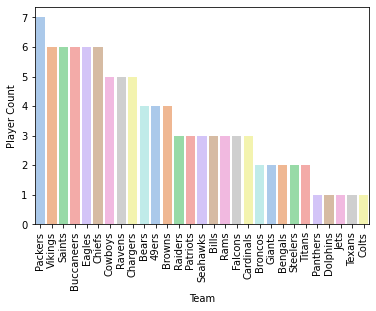

In [8]:
# creating a list called all teams that have at least ONE player in the Top 100
teams = top_teams['Team']

# creating a list with the count of players by team
count = top_teams['Player Count']

# creating a barplot using seaborn
sns.barplot(x = teams, y = count, palette = sns.color_palette('pastel'))

# rotating the x axis to 90 degrees for better visibility
plt.xticks(rotation = 90)
plt.show();

In [9]:
# calculating how many unique teams have at least one player in the Top 100 players

total_teams = df['Team'].nunique() # number of total unique teams 
teams_100 = top_100['Team'].nunique() # number of unique teams in the top 100 

percentage_teams_100 = round(teams_100/total_teams*100,1) # divind the number of teams by the total number of teams to understand what % of teams make up for the top 100 players

print("Out of the 32 NFL teams, {}% have at least one player in the Top 100 players".format(percentage_teams_100))

Out of the 32 NFL teams, 90.6% have at least one player in the Top 100 players


### Creating a function to label any player above the average rating in the Top 100 players 

+ Above Average - Elite
+ Equal to or below Top 100 Player Average - Great

In [10]:
# getting the average rating of the Top 100 players
top_avg = top_100['Overall Rating'].mean()


# creating a function to label the player based on the rating. If the rating is greater than the average, label them Elite, else Great 
def label_players(rating):
    # if the rating of the player is lower than the average of the top 100 players 
    if rating < top_avg:
        return 'Great'
    else:
        return 'Elite'   # if it is higher label them
    return rating


top_100['player_status'] = top_100['Overall Rating'].apply(label_players) # applying the function to the Top 100

<ipython-input-10-29da0bd3d808>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_100['player_status'] = top_100['Overall Rating'].apply(label_players) # applying the function to the Top 100


In [11]:
# printing out statement to answer questions

elite_players = top_100[top_100['player_status'] == 'Elite']['player_status'].count()
great_players = top_100[top_100['player_status'] == 'Great']['player_status'].count()

print("After analyzing the Top 100 players, the average rating is {} overall. From the 100 players, {} are above average and considered Elite, whereas {} players are below the average rating but considered Great players.".format(top_avg, elite_players, great_players))

After analyzing the Top 100 players, the average rating is 92.02 overall. From the 100 players, 38 are above average and considered Elite, whereas 62 players are below the average rating but considered Great players.


In [12]:
# getting the average age of the Top 100 rated players

avg_age = round(top_100['Age'].mean(), 0)
avg_age

28.0

In [13]:
# creating a function to label the player over or under the average age
def players_age(age):
    if age < avg_age:
        return 'Over'
    else:
        return 'Under'
    return age

In [14]:
# applying the function and creating a new column for it in the Top 100
top_100['Over/Under Age'] = top_100['Age'].apply(players_age)

<ipython-input-14-c990310d082f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_100['Over/Under Age'] = top_100['Age'].apply(players_age)


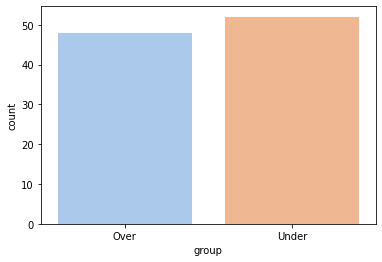

In [32]:
# creating a new table grouped by the Over/Under Age column and counting the numbers of players in each group
ages = top_100.groupby('Over/Under Age').count()['rank'].reset_index().rename({"rank" : "count", "Over/Under Age" : "group"}, axis = 1)

# creating the x-axis for the visualization
ages_x = ages['group']

# creating the y-axis for the visualization
ages_y = ages['count']

# creating the barplot using seaborn
sns.barplot(x = ages_x, y = ages_y, palette = sns.color_palette('pastel'))
plt.show();

In [33]:
# getting the count of players over the average age of 28
over = top_100[top_100['Over/Under Age'] == 'Over']['Over/Under Age'].count()

# getting the count of players under the average age of 28
under = top_100[top_100['Over/Under Age'] == 'Under']['Over/Under Age'].count()

# printing out a formatted statement with the numbers 
print(f"Out of the Top 100 NFL players, {over} amount were over the average age of {avg_age}. Meanwhile, {under} players of the 100 were under the age.")

Out of the Top 100 NFL players, 48 amount were over the average age of 28.0. Meanwhile, 52 players of the 100 were under the age.


In [17]:
# creating a table by position, getting the count of players by position and average age and also renaming some columns 
positions = top_100.groupby('Position').agg({"Overall Rating" : "count", "Age" : "mean"}).reset_index().rename({"Overall Rating" : "Player Count", "Age" : "Avg Age"}, axis = 1).sort_values(by = 'Player Count', ascending = False)

# switching the age from float to integer
positions['Avg Age'] = positions['Avg Age'].astype(int) 

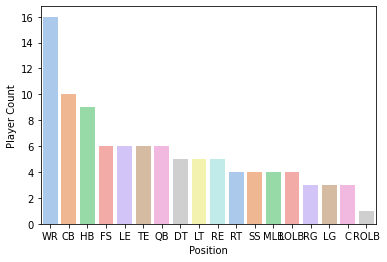

In [19]:
# creating the x-axis for the visualization
x = positions['Position'] 

# creating the y-axis for the visualization
y = positions['Player Count']

# # creating the barplot using seaborn
sns.barplot(x = x, y = y, palette = sns.color_palette('pastel'))
plt.show();